In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [4]:
def show_countplot(column):
    plt.figure(figsize=(20,5))
    sns.countplot(data=training, x=column).set_title(column)
    plt.show()
    
def show_distplot(column):
    plt.figure(figsize=(12, 4))
    sns.distplot(training[column], bins=50)
    plt.show()
    
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [5]:
training = pd.read_csv('dataset/train_V2.csv') #load the training dataset
training.info() #show the dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [6]:
training = reduce_mem_usage(training)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int8
boosts             int8
damageDealt        float16
DBNOs              int8
headshotKills      int8
heals              int8
killPlace          int8
killPoints         int16
kills              int8
killStreaks        int8
longestKill        float16
matchDuration      int16
matchType          object
maxPlace           int8
numGroups          int8
rankPoints         int16
revives            int8
rideDistance       float16
roadKills          int8
swimDistance       float16
teamKills          int8
vehicleDestroys    int8
walkDistance       float16
weaponsAcquired    int16
winPoints          int16
winPlacePerc       float16
dtypes: float16(6), int16(5), int8(14), object(4)
memory usage: 288.4+ MB


In [5]:
training['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [7]:
training = training.loc[training['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp'])]
training.shape

(4411699, 29)

In [8]:
print("average kill is: "+format(training['kills'].mean()))
print("most kill is: "+format(training['kills'].max()))
print("most people kill is within: "+format(training['kills'].quantile(0.99)))

average kill is: 0.9116070702012988
most kill is: 33
most people kill is within: 7.0


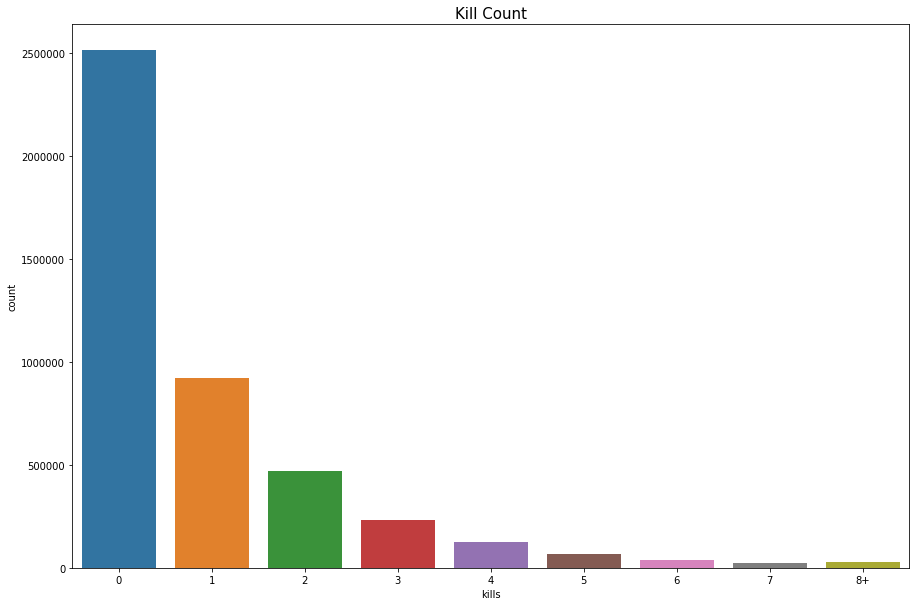

In [8]:
plt.figure(figsize=(15,10))
training.loc[training['kills'] > training['kills'].quantile(0.99)] = '8+'
sns.countplot(training['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()


# delete null data

In [9]:
training[training['winPlacePerc'].isnull()] #delete null data
training.drop(2744604, inplace=True)

In [10]:
training.shape

(4411698, 29)

# drop killwithout moving and their team-members

In [44]:
training['totalDistance'] = training['rideDistance'] + training['walkDistance'] + training['swimDistance']
training['killsWithoutMoving'] = ((training['kills'] > 0) & (training['totalDistance'] == 0))
display(training[training['killsWithoutMoving'] == True].shape)
training[training['killsWithoutMoving'] == True].head(10)




(222, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
50388,85a66d012137c6,882dcca8522981,9fa058d8629fbc,0,0,100.0,0,0,0,44,...,0,0.0,0,0,0.0,1,0,0.057495,0.0,True
58577,1ab4e217a226ed,20c0de1c47aa36,b70cd3db21d527,0,0,200.0,0,0,0,22,...,0,0.0,0,0,0.0,1,1523,0.085999,0.0,True
91841,46b7ba69a2214b,3ac685e9b2d389,c2f9236e2dd50c,0,0,100.0,1,0,0,38,...,0,0.0,0,0,0.0,1,1498,0.023804,0.0,True
94460,9497c5afa1eee1,7a2f11d01d79cb,cae8f5fab2e88e,0,0,100.0,0,1,0,40,...,0,0.0,0,0,0.0,1,1382,0.052094,0.0,True
95288,2e57a575aab6c5,3860c7d3ee13df,875a8c1979d8ba,0,0,100.0,0,0,0,48,...,0,0.0,0,0,0.0,0,1536,0.020599,0.0,True
95971,97056f5f661ecd,006c6b1a293263,29180779243d81,0,0,100.0,0,0,0,42,...,0,0.0,0,0,0.0,1,0,0.053192,0.0,True
122554,67263ee627ca17,f32d35ca938642,9486110b9412e7,0,0,100.0,1,0,0,42,...,0,0.0,0,0,0.0,1,0,0.000000,0.0,True
150734,c1beef18cbab89,1bac150a2f9271,9f94e03d48eccc,0,0,100.0,0,0,0,49,...,0,0.0,0,0,0.0,1,1337,0.030899,0.0,True
151174,b5bcab07e38058,f286fc37d5f8d9,6e7e4d89fc2242,0,0,100.0,0,0,0,41,...,0,0.0,0,0,0.0,1,1476,0.051514,0.0,True
183298,3b4f96f9f8db99,76fcc99c55f44e,c7e7c6cd8a22fa,0,0,100.0,0,1,0,46,...,0,0.0,0,0,0.0,1,1402,0.052094,0.0,True


In [45]:
killwithoutmoving = training[training['killsWithoutMoving'] == True]
killwithoutmoving.head(5)
#training.drop(np.where training['matchId']==killwithoutmoving['matchId'] & )

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
50388,85a66d012137c6,882dcca8522981,9fa058d8629fbc,0,0,100.0,0,0,0,44,...,0,0.0,0,0,0.0,1,0,0.057495,0.0,True
58577,1ab4e217a226ed,20c0de1c47aa36,b70cd3db21d527,0,0,200.0,0,0,0,22,...,0,0.0,0,0,0.0,1,1523,0.085999,0.0,True
91841,46b7ba69a2214b,3ac685e9b2d389,c2f9236e2dd50c,0,0,100.0,1,0,0,38,...,0,0.0,0,0,0.0,1,1498,0.023804,0.0,True
94460,9497c5afa1eee1,7a2f11d01d79cb,cae8f5fab2e88e,0,0,100.0,0,1,0,40,...,0,0.0,0,0,0.0,1,1382,0.052094,0.0,True
95288,2e57a575aab6c5,3860c7d3ee13df,875a8c1979d8ba,0,0,100.0,0,0,0,48,...,0,0.0,0,0,0.0,0,1536,0.020599,0.0,True


In [46]:
data = training.copy()
junk=data[data['killsWithoutMoving'] == True]
junk.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
50388,85a66d012137c6,882dcca8522981,9fa058d8629fbc,0,0,100.0,0,0,0,44,...,0,0.0,0,0,0.0,1,0,0.057495,0.0,True
58577,1ab4e217a226ed,20c0de1c47aa36,b70cd3db21d527,0,0,200.0,0,0,0,22,...,0,0.0,0,0,0.0,1,1523,0.085999,0.0,True
91841,46b7ba69a2214b,3ac685e9b2d389,c2f9236e2dd50c,0,0,100.0,1,0,0,38,...,0,0.0,0,0,0.0,1,1498,0.023804,0.0,True
94460,9497c5afa1eee1,7a2f11d01d79cb,cae8f5fab2e88e,0,0,100.0,0,1,0,40,...,0,0.0,0,0,0.0,1,1382,0.052094,0.0,True
95288,2e57a575aab6c5,3860c7d3ee13df,875a8c1979d8ba,0,0,100.0,0,0,0,48,...,0,0.0,0,0,0.0,0,1536,0.020599,0.0,True


In [47]:
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
merged_data.head(20)

,Id_x,groupId,matchId,assists_x,boosts_x,damageDealt_x,DBNOs_x,headshotKills_x,heals_x,killPlace_x,...,roadKills_y,swimDistance_y,teamKills_y,vehicleDestroys_y,walkDistance_y,weaponsAcquired_y,winPoints_y,winPlacePerc_y,totalDistance_y,killsWithoutMoving_y
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500000,0,0,0,57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.906250,0,0,0,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000000,1,1,0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.539062,0,0,0,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.593750,0,0,0,64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.281250,0,0,0,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
len(data.columns.values.tolist())

31

In [48]:
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
print(save_index)

['Id_x', 'groupId', 'matchId', 'assists_x', 'boosts_x', 'damageDealt_x', 'DBNOs_x', 'headshotKills_x', 'heals_x', 'killPlace_x', 'killPoints_x', 'kills_x', 'killStreaks_x', 'longestKill_x', 'matchDuration_x', 'matchType_x', 'maxPlace_x', 'numGroups_x', 'rankPoints_x', 'revives_x', 'rideDistance_x', 'roadKills_x', 'swimDistance_x', 'teamKills_x', 'vehicleDestroys_x', 'walkDistance_x', 'weaponsAcquired_x', 'winPoints_x', 'winPlacePerc_x', 'totalDistance_x', 'killsWithoutMoving_x']


In [49]:
training_x=merged_data[merged_data['killsWithoutMoving_y']!=True ]
training_x[save_index].head()

,Id_x,groupId,matchId,assists_x,boosts_x,damageDealt_x,DBNOs_x,headshotKills_x,heals_x,killPlace_x,...,roadKills_x,swimDistance_x,teamKills_x,vehicleDestroys_x,walkDistance_x,weaponsAcquired_x,winPoints_x,winPlacePerc_x,totalDistance_x,killsWithoutMoving_x
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0,244.75,1,1466,0.444336,244.75,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,11.039062,0,0,1434.00,5,0,0.640137,1445.00,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0,161.75,2,0,0.775391,161.75,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0,202.75,3,0,0.166748,202.75,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0,49.75,2,0,0.187500,49.75,False


In [50]:
get_colname=training.columns.values.tolist()
training=training_x[save_index]
training.columns=get_colname
training.shape


(4411321, 31)

data = training.copy()
junk=data[data['killsWithoutMoving'] == True] #change labels and criterion
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
training_x=merged_data[merged_data['killsWithoutMoving_y']!=True ] #change labels ands criterion
get_colname=training.columns.values.tolist()
training=training_x[save_index]
training.columns=get_colname
training.head()

# clean abnormal_roadkills

In [18]:
training['roadKills'].max()
training[training['roadKills']>5 ]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
196194,6cf1efa197bcc1,28df010b29a9e2,2e40495266529f,0,2,800.0,5,0,4,1,...,8,0.000000,0,0,1516.0000,3,0,0.653809,10080.00,False
215626,9ef0f556066da8,278849cc7a65de,348ff3a27810b7,0,0,700.0,0,0,0,2,...,7,7.441406,0,0,1959.0000,2,1512,0.389648,5444.00,False
381559,aa419c2e3baada,7f4a9befdfa2a4,74d78cb420efdd,0,0,800.0,0,0,0,1,...,8,14.312500,0,0,425.2500,2,1594,0.370361,1189.00,False
467656,aa7e78882e667d,519d050ae0c496,df3223d5b94550,0,0,800.0,0,0,0,3,...,8,244.750000,0,0,5472.0000,0,1536,0.528809,5716.00,False
471092,94fd407417cdd9,05697c619eb3b9,65d8fc69d581fa,2,3,1088.0,0,0,8,1,...,6,52.968750,0,0,2298.0000,3,1500,1.000000,5028.00,False
477673,c94afbf8ca2802,b4fd636406e765,508b39d4a78c60,0,1,900.5,0,0,0,1,...,9,0.000000,0,0,398.0000,3,1485,0.348877,2368.00,False
740086,64a6d745f438f6,2eebb86cac2255,596a2c5f8def01,1,1,661.0,5,0,5,2,...,6,0.000000,0,0,2856.0000,4,1510,0.666504,9280.00,False
1107480,b6f3fdb84def47,938c82cc2383fe,e7378c1bd5a9f0,0,0,800.0,2,0,0,4,...,6,0.000000,2,0,147.7500,4,1500,0.212769,504.25,False
1315086,84612de7dac846,4d92385e808577,f56c7acf75d478,0,0,990.5,0,0,0,1,...,9,6.562500,0,0,1023.0000,2,1539,0.544434,2134.00,False
1357050,c344e8bfa5e5c5,27ef100f821b61,81c6fc5167c8fd,0,5,1000.0,0,3,4,1,...,7,11.546875,0,0,3280.0000,5,1543,0.834961,3998.00,False


In [51]:

training['abnormal_roadkills'] = ((training['roadKills'] > 3) & (training['rideDistance'] < 1000)) #adjustable criterion
display(training[training['abnormal_roadkills'] == True].shape)
training[training['abnormal_roadkills'] == True].head(10)

(17, 32)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,abnormal_roadkills
60032,62b624830aea23,ccc1caa893028a,98249433317a6d,0,3,545.5,1,0,5,8,...,238.875000,0,0,1289.000,2,0,0.617188,1528.00,False,True
72138,bbbab83a5c625d,5db857b853c7ee,e01f130fcc619b,0,0,1100.0,0,4,0,2,...,8.953125,0,0,1182.000,2,1536,0.438477,1609.00,False,True
381559,aa419c2e3baada,7f4a9befdfa2a4,74d78cb420efdd,0,0,800.0,0,0,0,1,...,14.312500,0,0,425.250,2,1594,0.370361,1189.00,False,True
467656,aa7e78882e667d,519d050ae0c496,df3223d5b94550,0,0,800.0,0,0,0,3,...,244.750000,0,0,5472.000,0,1536,0.528809,5716.00,False,True
1107480,b6f3fdb84def47,938c82cc2383fe,e7378c1bd5a9f0,0,0,800.0,2,0,0,4,...,0.000000,2,0,147.750,4,1500,0.212769,504.25,False,True
1357050,c344e8bfa5e5c5,27ef100f821b61,81c6fc5167c8fd,0,5,1000.0,0,3,4,1,...,11.546875,0,0,3280.000,5,1543,0.834961,3998.00,False,True
1367391,36e985b414684a,6c25063ff4aa7a,1575921dd36ceb,0,0,214.5,3,0,0,5,...,0.000000,1,0,119.625,0,0,0.142944,392.00,False,True
1496563,fbbc956f2d0b85,9199e215619ca5,b75dee38c2eda7,0,0,600.0,5,0,0,3,...,0.000000,1,0,201.500,0,1484,0.076904,390.00,False,True
1588996,0ae5aeb59dc0b6,4fa102800e4573,530bb19b8a1c2f,0,0,676.0,0,1,0,2,...,14.328125,0,0,211.125,2,1622,0.259277,810.00,False,True
1892602,3c94a9005e1578,f09b9ff5d4d702,0a6d53f2e60714,0,0,900.0,0,2,0,2,...,14.210938,0,0,442.750,3,1500,0.297852,1347.00,False,True


In [52]:
data = training.copy()
junk=data[data['abnormal_roadkills'] == True]
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
training_x=merged_data[merged_data['abnormal_roadkills_y']!=True ]
get_colname=training.columns.values.tolist()
training=training_x[save_index]
training.columns=get_colname
training.shape

(4411269, 32)

# clean killsPerDistance outlier

In [53]:
training['killsPerDistance'] = ((training['kills']>3) & (training['totalDistance'] < 100))
training[['kills', 'walkDistance', 'rideDistance', 'killsPerDistance', 'winPlacePerc']].sort_values(by='killsPerDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerDistance,winPlacePerc
3495214,5,36.53125,0.0,True,0.113586
3514581,4,38.12500,0.0,True,0.231567
2420193,4,20.93750,0.0,True,0.159546
2058145,4,66.56250,0.0,True,0.040009
1684688,4,83.00000,0.0,True,0.178955
2705781,4,98.12500,0.0,True,0.035706
3382872,5,99.81250,0.0,True,0.161255
3435628,4,86.56250,0.0,True,0.129028
2504104,6,81.68750,0.0,True,0.296387
683337,4,67.00000,0.0,True,0.157959


In [54]:
data = training.copy()
junk=data[data['killsPerDistance'] == True]
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
training_x=merged_data[merged_data['killsPerDistance_y'] != True ]
get_colname=training.columns.values.tolist()
training1=training_x[save_index]
training1.columns=get_colname
training1.shape

(4409296, 33)

# Clean abnormal walk distance

In [17]:
training.drop(training[training['walkDistance'] > 10000].index, inplace=True)

In [ ]:

plt.figure(figsize=(15,8))
sns.boxplot(x="walkDistance", y="winPlacePerc", data=training)

plt.show()

# drop abnormal-longkill

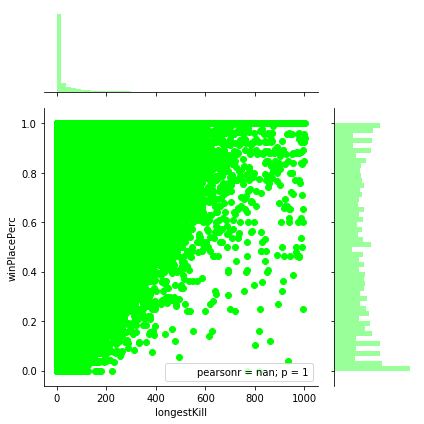

In [57]:
sns.jointplot( x="longestKill", y="winPlacePerc",  data=training,  ratio=3, color="lime")
plt.show()

In [112]:
training['longestKill'].describe()

count    4410999.000
mean             NaN
std              NaN
min            0.000
25%            0.000
50%            0.000
75%           21.125
max         1003.000
Name: longestKill, dtype: float64

In [23]:
training['abnormal_longestKill'] = (training['longestKill']>500)
#display(training[ training['abnormal_longestKill'] ==True].shape)    
training[training['abnormal_longestKill'] == True].shape

(1706, 34)

In [24]:
data = training.copy()
junk=data[data['abnormal_longestKill'] == True]
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
training_x=merged_data[merged_data['abnormal_longestKill_y'] != True ]
get_colname=training.columns.values.tolist()
training=training_x[save_index]
training.columns=get_colname
training.shape

(4406626, 34)

# abnormal num of groups

In [14]:
 training['abnormal_numGroups'] = (training['numGroups'] <10)
training[training['abnormal_numGroups'] == True].shape

(7804, 31)

In [15]:
training.drop(training[training['abnormal_numGroups'] == True].index, inplace=True)

# clean abnormal weapon_aquaire 

In [13]:
training['abnormal_weaponsAcquired'] = (training['weaponsAcquired']>30) 
training[training['abnormal_weaponsAcquired'] == True].head(10).T

,185056,195453,233643,309584,365302,422018,464124,493086,588387,611920
Id,009d57d25f387f,3ef48e7e7c7587,7c8c83f5f97d0f,bf6f55734ed60a,1d4c932092c647,79497b3ad02a5e,2e36b7589a065a,1a5e9e515dac34,c58e3e0c2ba678,e100c9512c4b71
groupId,d433eda5ca10d8,c20651fe3d4171,b33b210a52a2f8,e985176cd8db41,74308c789c80a9,64ec3f1e594f01,667b7c652802e1,45977b5d5db6ee,3d3e6100c07ff0,8493599f1759f2
matchId,8842de7d656889,cdb49a54a80c51,2e8a0917a71c43,d043dc27463023,328cab4a890ba4,fa085380974299,53a2310a35a149,f0a26d38d1078c,d04dbb98249f76,a3f87f96400a1b
assists,0,0,0,0,0,0,1,0,0,0
boosts,2,1,0,0,0,4,1,0,1,8
damageDealt,388.5,0,67.125,325.75,0,184.5,48.8438,452.25,175.25,293
DBNOs,2,0,0,0,0,1,0,0,1,3
headshotKills,1,0,0,0,0,0,0,0,0,1
heals,3,0,0,0,0,1,1,0,2,4
killPlace,6,60,44,6,3,28,49,10,48,8


In [31]:
training[training['abnormal_weaponsAcquired'] == True].shape

(5, 35)

In [87]:
data = training.copy()
junk=data[data['abnormal_weaponsAcquired'] == True]
merged_data=pd.merge(data,junk, on=['matchId','groupId'], how='left')
save_index=merged_data.columns.values.tolist()[0:len(data.columns.values.tolist())]
training_x=merged_data[merged_data['abnormal_weaponsAcquired_y'] != True ]
get_colname=training.columns.values.tolist()
training=training_x[save_index]
training.columns=get_colname
training.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,abnormal_roadkills,killsPerDistance,abnormal_weaponsAcquired
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,244.75,1,1466,0.444336,244.75,False,False,False,False
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,1434.00,5,0,0.640137,1445.00,False,False,False,False
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,161.75,2,0,0.775391,161.75,False,False,False,False
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,202.75,3,0,0.166748,202.75,False,False,False,False
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,49.75,2,0,0.187500,49.75,False,False,False,False


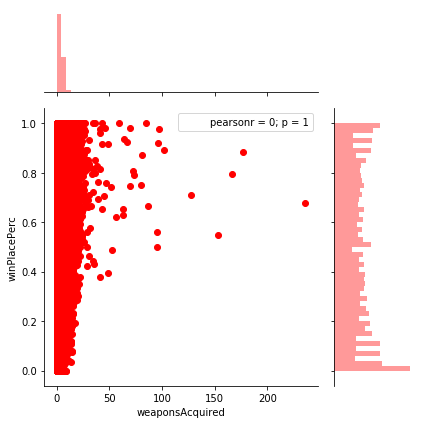

In [58]:
sns.jointplot( x="weaponsAcquired", y="winPlacePerc",  data=training,  ratio=3, color="red")
plt.show()

#  abnormal heal and boost(but no need to delete them)

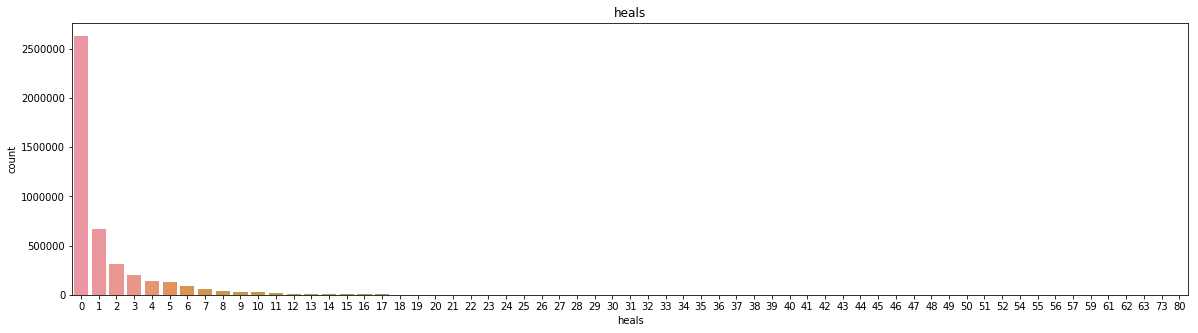

In [91]:
show_countplot('heals')

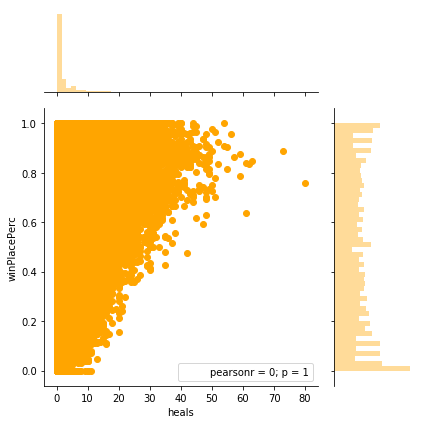

In [16]:
sns.jointplot( x="heals", y="winPlacePerc",  data=training,  ratio=3, color="orange")
plt.show()

In [93]:
training['heals'].max()
display(training[training['heals'] >40].shape)
training[training['heals'] >50].head(10)



(114, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,abnormal_roadkills,killsPerDistance,abnormal_weaponsAcquired,playersJoined,killsNorm,damageDealtNorm
125437,c45bd6917146e2,81ab9f863957cb,4335664c6716fa,0,2,0.000000,0,0,52,49,...,1543,0.833496,1343.0,False,False,False,False,97,0.00,0.000000
695059,512ca0f7c6729b,de2c3988154e5e,03a24daa0f3e65,0,3,0.000000,3,0,61,48,...,0,0.636230,1627.0,False,False,False,False,90,0.00,0.000000
800637,1b1d77a24be1e1,4b83c72836d02e,109b5a0176fc3e,0,5,0.000000,0,0,57,46,...,0,0.861816,5612.0,False,False,False,False,95,0.00,0.000000
988772,6737eed1cf8dfc,12cc81f7d2eb4d,5f9a59a3ef190d,0,6,1.824219,0,0,63,37,...,1516,0.848145,5656.0,False,False,False,False,80,0.00,2.189062
1479785,d124f43ee5d74f,dd2f436c57ca92,15154e6d9e5333,0,2,94.500000,0,1,55,10,...,0,0.814941,3962.0,False,False,False,False,92,2.16,102.060000
2051306,2dbfd2d0a51710,c242313874f3da,3c8d50f42ead8d,1,7,358.000000,1,0,59,27,...,1602,0.875000,5152.0,False,False,False,False,96,1.04,372.320000
2304010,edfd3c24340b50,86a65f3b07a416,298a1428dc889f,0,5,152.250000,2,1,52,23,...,0,0.923340,2576.0,False,False,False,False,88,1.12,170.520000
2353680,f0e15bbbe1a8f1,7a0adcf5383a9a,a6473a027234d9,3,3,179.750000,2,1,54,10,...,0,1.000000,5760.0,False,False,False,False,93,2.14,192.332500
2615714,74554be92b2f9a,54ad9e377c0f34,628f99c2113688,0,14,0.000000,0,0,51,45,...,0,0.703613,817.0,False,False,False,False,97,0.00,0.000000
2799479,26581a46d6ff21,4d2b612b7a2ceb,145fcbcd6748db,0,4,0.000000,0,0,51,44,...,0,0.777832,6432.0,False,False,False,False,99,0.00,0.000000


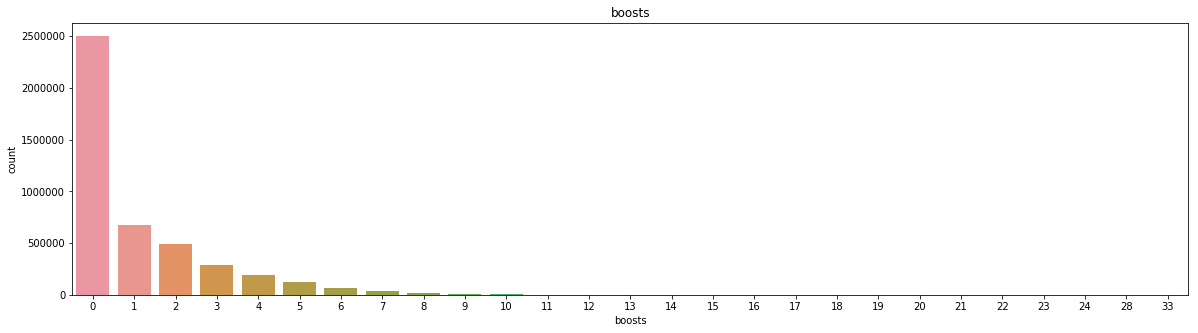

In [92]:
show_countplot('boosts')

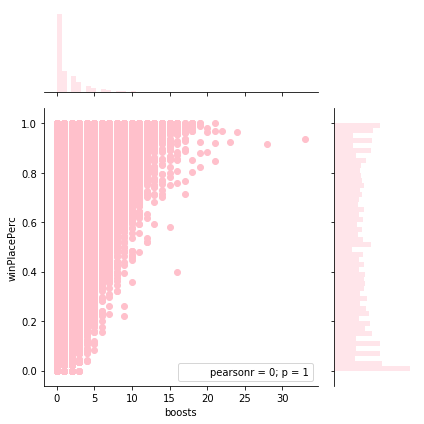

In [68]:
sns.jointplot( x="boosts", y="winPlacePerc",  data=training,  ratio=3, color="pink")
plt.show()

In [97]:
training['boosts'].max()
display(training[training['boosts'] >20].shape)
training[training['boosts'] >20].head(10)

(10, 37)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,winPoints,winPlacePerc,totalDistance,killsWithoutMoving,abnormal_roadkills,killsPerDistance,abnormal_weaponsAcquired,playersJoined,killsNorm,damageDealtNorm
58840,250febb1876af9,0dd6baeb4d49c4,59c7587fd0a589,1,21,254.625000,1,0,3,15,...,1491,0.918457,4048.00,False,False,False,False,100,2.00,254.625000
447247,5b0d0f8b2d5aab,35008a7f1ec1a2,dd814381c28540,0,33,787.500000,6,3,3,1,...,1531,0.935547,2790.00,False,False,False,False,95,8.40,826.875000
681593,714daf671ceed2,d160f8734281f7,fb48905b205c76,0,21,978.500000,0,2,2,1,...,1500,1.000000,8800.00,False,False,False,False,93,11.77,1046.995000
1453428,1d85e9f3c46f1a,922edc8b32c161,0b5bd195ccd136,0,24,746.500000,0,4,1,2,...,1562,0.966309,5824.00,False,False,False,False,90,7.70,821.150000
1520719,5b7d6f8755297b,21ca99dabb7227,9be7d4c30e4a0a,0,28,0.000000,0,0,13,44,...,0,0.915039,2488.00,False,False,False,False,94,0.00,0.000000
1865968,ddd11eabefc9df,1216e92d353209,6cc83d956a5cb3,0,21,22.046875,0,0,17,45,...,1588,0.847656,1586.00,False,False,False,False,94,0.00,23.369688
1958175,61af2d1c46b9b9,27cee0e5fcac6b,004760d4b1aa7e,2,23,522.500000,2,2,7,4,...,1661,0.923340,4552.00,False,False,False,False,93,4.28,559.075000
1962799,4781af86e5eede,20b882e9101ea1,c2cf5ed1dfcc47,0,22,303.000000,0,2,0,8,...,0,0.968262,2518.00,False,False,False,False,95,3.15,318.150000
2600405,e6997b4d563e38,203967eb79d1e3,64ba435401dfb8,1,21,811.000000,0,2,2,1,...,0,0.968750,4492.00,False,False,False,False,97,7.21,835.330000
3947500,d16b329d5ea64f,ba50388b7256f1,57770aadb2235b,0,24,0.000000,0,0,1,4,...,0,0.000000,267.25,False,False,False,False,15,0.00,0.000000


In [60]:
training.drop(3947500, inplace=True)

# Normalization of damage and kills

In [61]:
training['playersJoined'] = training.groupby('matchId')['matchId'].transform('count')
training[training['playersJoined'] >10].head(10)
training['killsNorm'] = training['kills']*((100-training['playersJoined'])/100 + 1)
training['damageDealtNorm'] = training['damageDealt']*((100-training['playersJoined'])/100 + 1)
training[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][5:8]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
5,95,1,1.05,100.000000,105.000000
6,97,0,0.00,0.000000,0.000000
7,96,0,0.00,8.539062,8.880625


# write clean data

In [118]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406356 entries, 0 to 4411393
Data columns (total 38 columns):
Id                          object
groupId                     object
matchId                     object
assists                     int8
boosts                      int8
damageDealt                 float16
DBNOs                       int8
headshotKills               int8
heals                       int8
killPlace                   int8
killPoints                  int16
kills                       int8
killStreaks                 int8
longestKill                 float16
matchDuration               int16
matchType                   object
maxPlace                    int8
numGroups                   int8
rankPoints                  int16
revives                     int8
rideDistance                float16
roadKills                   int8
swimDistance                float16
teamKills                   int8
vehicleDestroys             int8
walkDistance                float16
wea

In [62]:
training.drop('abnormal_weaponsAcquired',axis = 1,inplace = True)

In [64]:
training.drop('killsWithoutMoving',axis = 1,inplace = True)
training.drop('abnormal_roadkills',axis = 1,inplace = True)


In [65]:
training.drop('killsPerDistance',axis = 1,inplace = True)



In [66]:
training1 = reduce_mem_usage(training)
training1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4403464 entries, 0 to 4411320
Data columns (total 34 columns):
Id                    object
groupId               object
matchId               object
assists               int8
boosts                int8
damageDealt           float16
DBNOs                 int8
headshotKills         int8
heals                 int8
killPlace             int8
killPoints            int16
kills                 int8
killStreaks           int8
longestKill           float16
matchDuration         int16
matchType             object
maxPlace              int8
numGroups             int8
rankPoints            int16
revives               int8
rideDistance          float16
roadKills             int8
swimDistance          float16
teamKills             int8
vehicleDestroys       int8
walkDistance          float16
weaponsAcquired       int16
winPoints             int16
winPlacePerc          float16
totalDistance         float16
abnormal_numGroups    float16
playersJoined

In [67]:
training1.to_csv('dataset/data_clean(2).csv',header=True,sep=",")